In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [2]:
ds_co = pd.read_csv('CSV/GaCo01_01.csv')
ds_pt = pd.read_csv('CSV/GaPt03_01.csv')


In [3]:
ds_co.shape

(12118, 19)

In [4]:
ds_co = ds_co.iloc[:, 1:-2]
ds_pt = ds_pt.iloc[:, 1:-2]

In [5]:
poly = PolynomialFeatures(degree=3)
ds_co_poly = poly.fit_transform(ds_co)
ds_pt_poly = poly.fit_transform(ds_pt)

In [6]:
poly.get_feature_names(ds_co.columns)[150]

'VGRF_right_s7^2'

<IPython.core.display.Javascript object>


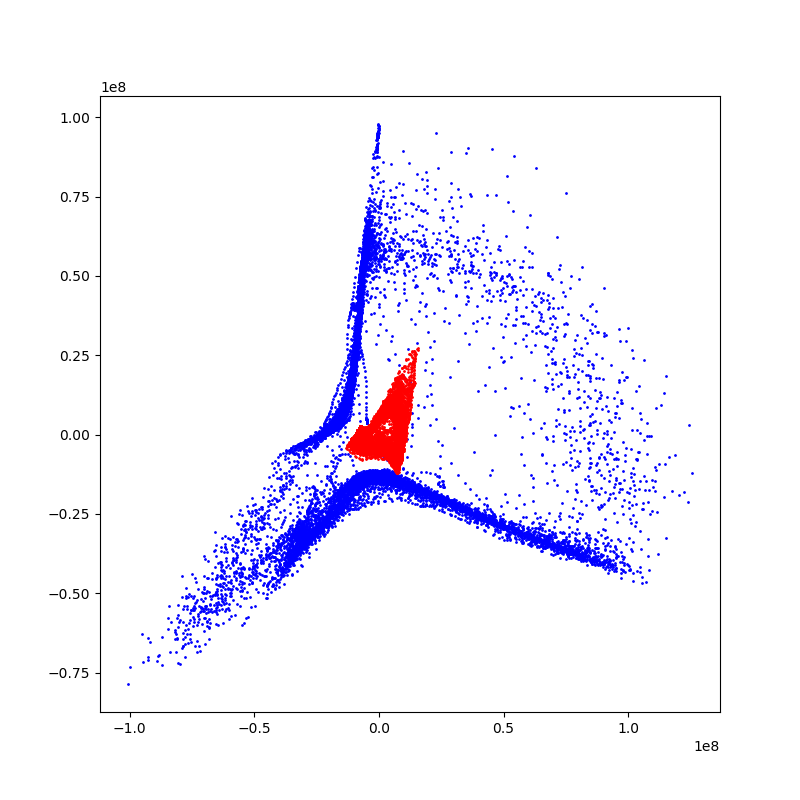

In [7]:
fig1, subaxes = plt.subplots(1, 1, figsize=(8,8))

pca1 = decomposition.PCA(n_components=2)
ds_co_poly_pca = pca1.fit_transform(ds_co_poly)
ds_pt_poly_pca = pca1.fit_transform(ds_pt_poly)
# ds_co_poly_pca = pca.transform(ds_co_poly)
subaxes.scatter(ds_co_poly_pca[:, 0], ds_co_poly_pca[:, 1],  c='blue' ,s=1)
subaxes.scatter(ds_pt_poly_pca[:, 0], ds_pt_poly_pca[:, 1],  c='red' ,s=1)


In [8]:
ds_co_poly_pca.shape

(12118, 2)

In [9]:
df_co = pd.DataFrame(ds_co_poly_pca)
df_pt = pd.DataFrame(ds_pt_poly_pca)


In [10]:
df_pca1 = pd.DataFrame(pca1.components_)
df_pca1

,0,1,2,3,4,5,6,7,8,9,...,959,960,961,962,963,964,965,966,967,968
0,-2.879228e-19,-0.000003,-0.000007,-0.000007,-0.000005,-2.267833e-06,-4.840332e-06,-8.466266e-06,-0.000003,0.000003,...,0.025252,0.047509,0.006151,0.112966,0.013238,0.000651,0.345515,0.035293,0.002843,-0.004438
1,-2.021163e-16,0.000002,0.000004,0.000004,0.000001,7.335115e-07,-9.084715e-07,-7.828890e-07,-0.000002,-0.000006,...,0.055634,0.095829,0.015169,0.209006,0.027925,0.005111,0.572273,0.066173,0.009753,0.004192


In [11]:
pd.DataFrame(pca1.components_).apply((lambda x: x.max()), axis=1)

0    0.345515
1    0.572273
dtype: float64

In [12]:
pd.DataFrame(pca1.components_).apply((lambda x: x.argmax()), axis=1)

0    965
1    965
dtype: int64

In [13]:
pca1.explained_variance_

array([  4.74106669e+13,   2.66472177e+13])

<IPython.core.display.Javascript object>


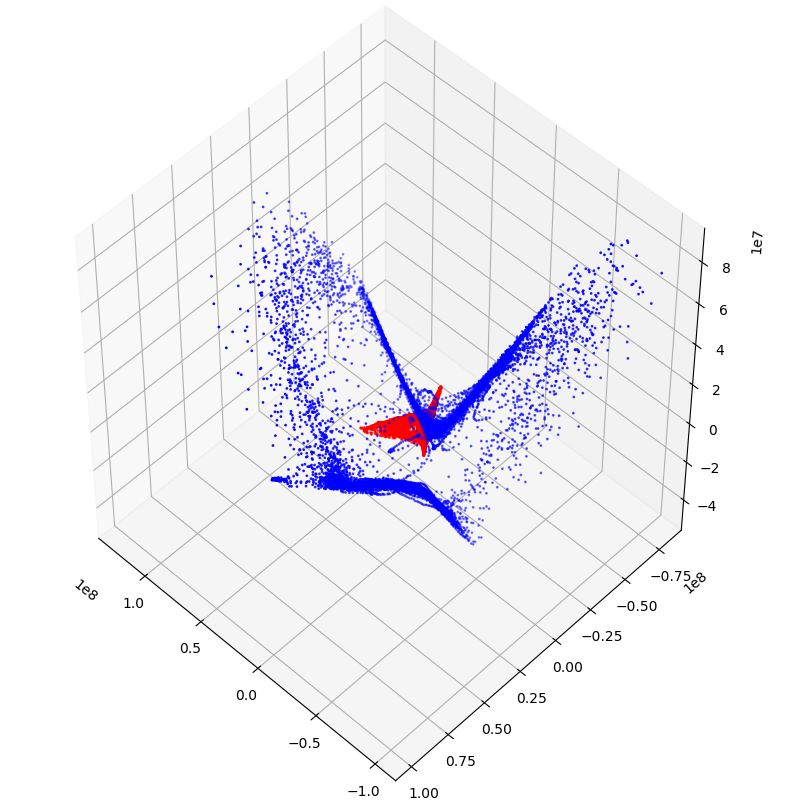

In [14]:
fig = plt.figure(figsize=(8,8))

subaxes1 = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
pca = decomposition.PCA(n_components=3)
ds_co_poly_pca2 = pca.fit_transform(ds_co_poly)
ds_pt_poly_pca2 = pca.fit_transform(ds_pt_poly)

subaxes1.scatter(ds_co_poly_pca2[:, 0], ds_co_poly_pca2[:, 1], ds_co_poly_pca2[:, 2],  c='blue' ,s=1)
subaxes1.scatter(ds_pt_poly_pca2[:, 0], ds_pt_poly_pca2[:, 1], ds_pt_poly_pca2[:, 2],  c='red' ,s=1)



In [15]:
print(pca.explained_variance_ )

[  4.74106669e+13   2.66472177e+13   1.92553341e+13]


In [16]:
ds_co.shape

(12118, 16)

In [17]:
df_co.to_csv('PCA/PCA_GaCo01_01.csv')
df_pt.to_csv('PCA/PCA_GaPt03_01.csv')

In [18]:
df_pca1.to_csv('Significant2d/GaCo01_01GaPt03_01.csv')